# Red Wine Quality Prediction

In [118]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import zscore
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [119]:
#Import file/dataset
df=pd.read_csv("Wine_quality.csv")
pd.set_option('display.max_rows',None)
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00            1.90      0.076   
1               7.8             0.880         0.00            2.60      0.098   
2               7.8             0.760         0.04            2.30      0.092   
3              11.2             0.280         0.56            1.90      0.075   
4               7.4             0.700         0.00            1.90      0.076   
5               7.4             0.660         0.00            1.80      0.075   
6               7.9             0.600         0.06            1.60      0.069   
7               7.3             0.650         0.00            1.20      0.065   
8               7.8             0.580         0.02            2.00      0.073   
9               7.5             0.500         0.36            6.10      0.071   
10              6.7             0.580         0.08            1.80      0.097   
11              7.5             0.500         0.36            6.10      0.071   
12              5.6             0.615         0.00            1.60      0.089   
13              7.8             0.610         0.29            1.60      0.114   
14              8.9             0.620         0.18            3.80      0.176   
15              8.9             0.620         0.19            3.90      0.170   
16              8.5             0.280         0.56            1.80      0.092   
17              8.1             0.560         0.28            1.70      0.368   
18              7.4             0.590         0.08            4.40      0.086   
19              7.9             0.320         0.51            1.80      0.341   
20              8.9             0.220         0.48            1.80      0.077   
21              7.6             0.390         0.31            2.30      0.082   
22              7.9             0.430         0.21            1.60      0.106   
23              8.5             0.490         0.11            2.30      0.084   
24              6.9             0.400         0.14            2.40      0.085   
25              6.3             0.390         0.16            1.40      0.080   
26              7.6             0.410         0.24            1.80      0.080   
27              7.9             0.430         0.21            1.60      0.106   
28              7.1             0.710         0.00            1.90      0.080   
29              7.8             0.645         0.00            2.00      0.082   
30              6.7             0.675         0.07            2.40      0.089   
31              6.9             0.685         0.00            2.50      0.105   
32              8.3             0.655         0.12            2.30      0.083   
33              6.9             0.605         0.12           10.70      0.073   
34              5.2             0.320         0.25            1.80      0.103   
35              7.8             0.645         0.00            5.50      0.086   
36              7.8             0.600         0.14            2.40      0.086   
37              8.1             0.380         0.28            2.10      0.066   
38              5.7             1.130         0.09            1.50      0.172   
39              7.3             0.450         0.36            5.90      0.074   
40              7.3             0.450         0.36            5.90      0.074   
41              8.8             0.610         0.30            2.80      0.088   
42              7.5             0.490         0.20            2.60      0.332   
43              8.1             0.660         0.22            2.20      0.069   
44              6.8             0.670         0.02            1.80      0.050   
45              4.6             0.520         0.15            2.10      0.054   
46              7.7             0.935         0.43            2.20      0.114   
47              8.7             0.290         0.52            1.60      0.113   
48              6.4             0.400

In [120]:
df.shape

(1599, 12)

In [121]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<AxesSubplot:title={'center':'Distribution of Quality variable'}, xlabel='quality', ylabel='count'>

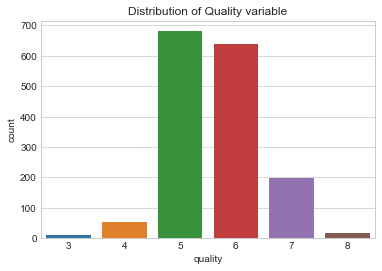

In [123]:
#Target variable distribution
plt.title("Distribution of Quality variable")
sns.countplot(x="quality",data=df)

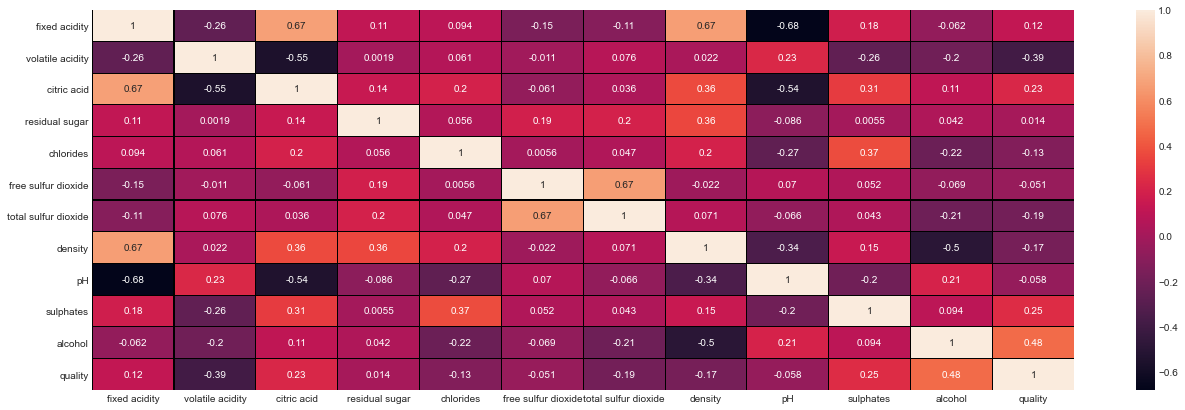

In [124]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black")
plt.show()

In [125]:
#Lets check the target variable
df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [126]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [127]:
# Create Classification version of target variable
df['gbquality'] = [1 if x >= 7 else 0 for x in df['quality']]
df.head()
# Separate feature variables and target variable
#X = df.drop(['quality','goodquality'], axis = 1)
#y = df['goodquality']

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  gbquality  
0      9.4        5          0  
1      9.8        5          0  
2      9.8        5          0  
3      9.8        6          0  
4      9.4        5          0

In [128]:
df.gbquality.value_counts()

0    1382
1     217
Name: gbquality, dtype: int64

In [129]:
dfnew=df.drop("quality",axis=1)
dfnew.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  gbquality  
0      9.4          0  
1      9.8          0  
2      9.8          0  
3      9.8          0  
4      9.4          0

# EDA

<AxesSubplot:xlabel='gbquality', ylabel='count'>

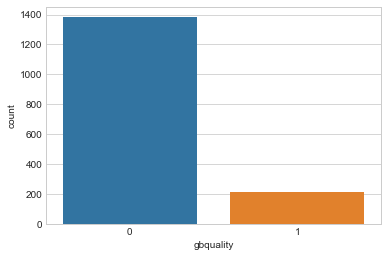

In [130]:
#Univariate anlysis
sns.countplot(x="gbquality",data=dfnew)

<AxesSubplot:>

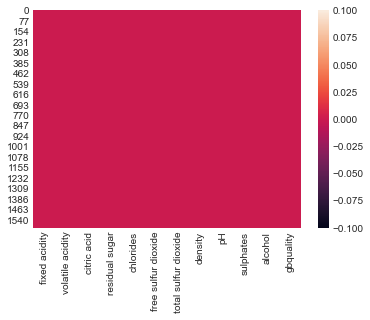

In [131]:
#To check missing values
sns.heatmap(dfnew.isnull())

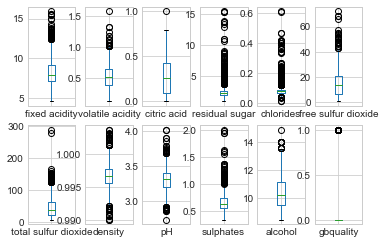

In [132]:
#Box plot 
dfnew.plot(kind='box',subplots=True,layout=(2,6))
plt.show()

<AxesSubplot:ylabel='Frequency'>

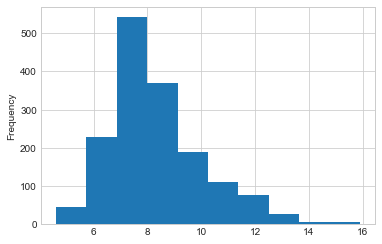

In [133]:
#Check data distribution of variables
dfnew["fixed acidity"].plot(kind="hist")
#Right skewed

<AxesSubplot:ylabel='Frequency'>

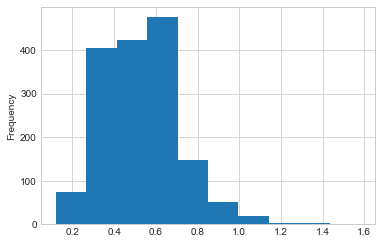

In [134]:
dfnew["volatile acidity"].plot(kind="hist")
#Right skewed

<AxesSubplot:ylabel='Frequency'>

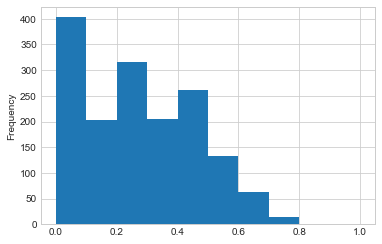

In [135]:
dfnew["citric acid"].plot(kind="hist")
#Right skewed

<AxesSubplot:ylabel='Frequency'>

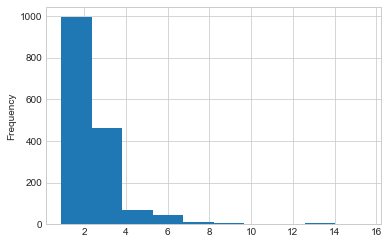

In [136]:
dfnew["residual sugar"].plot(kind="hist")
#Highly skewed toward positive side

<AxesSubplot:ylabel='Frequency'>

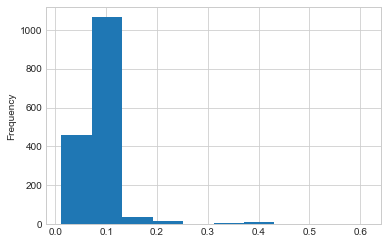

In [137]:
dfnew["chlorides"].plot(kind="hist")
#Highly skewed towards right

<AxesSubplot:ylabel='Frequency'>

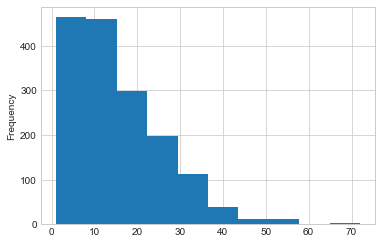

In [138]:
dfnew["free sulfur dioxide"].plot(kind="hist")
#Data is skewed to right

<AxesSubplot:ylabel='Frequency'>

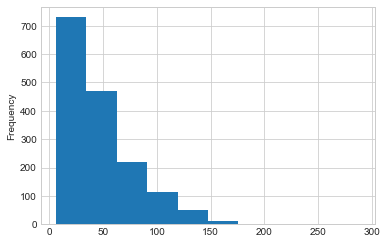

In [139]:
dfnew["total sulfur dioxide"].plot(kind="hist")
#Data is highly skewed

<AxesSubplot:ylabel='Frequency'>

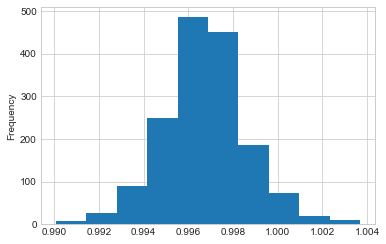

In [140]:
dfnew["density"].plot(kind="hist")
#Data is normally distributed

<AxesSubplot:ylabel='Frequency'>

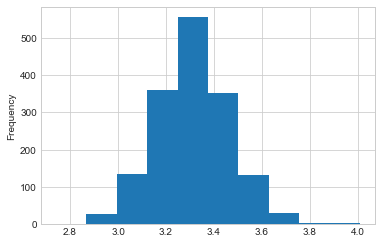

In [141]:
dfnew["pH"].plot(kind="hist")
#Data is normally distributed

<AxesSubplot:ylabel='Frequency'>

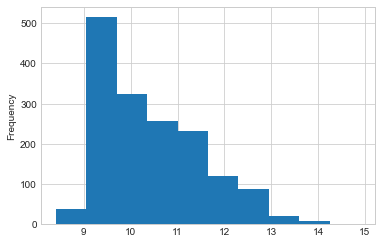

In [142]:
dfnew["alcohol"].plot(kind="hist")
#Data is skewed towards right

<AxesSubplot:xlabel='gbquality', ylabel='fixed acidity'>

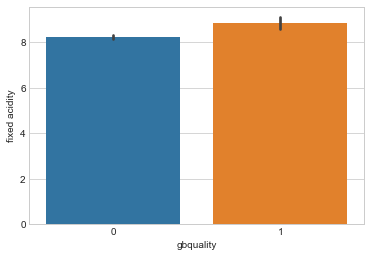

In [143]:
#Bi-variate analysis
sns.barplot(x="gbquality",y="fixed acidity",data=dfnew)

<AxesSubplot:xlabel='gbquality', ylabel='volatile acidity'>

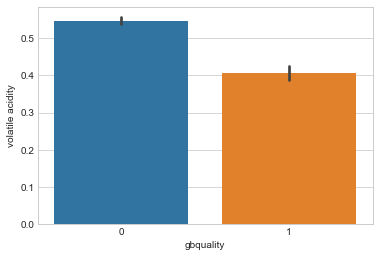

In [144]:
sns.barplot(x="gbquality",y="volatile acidity",data=dfnew)

<AxesSubplot:xlabel='gbquality', ylabel='citric acid'>

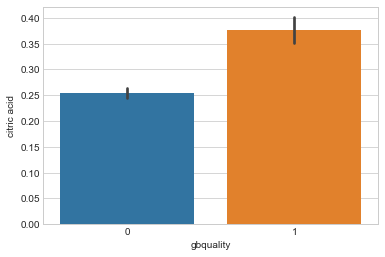

In [145]:
sns.barplot(x="gbquality",y="citric acid",data=dfnew)

<AxesSubplot:xlabel='gbquality', ylabel='residual sugar'>

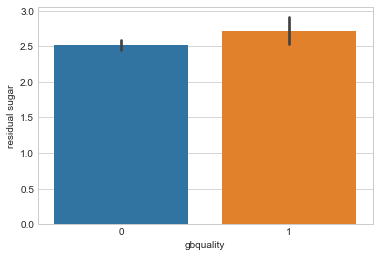

In [146]:
sns.barplot(x="gbquality",y="residual sugar",data=dfnew)

<AxesSubplot:xlabel='gbquality', ylabel='chlorides'>

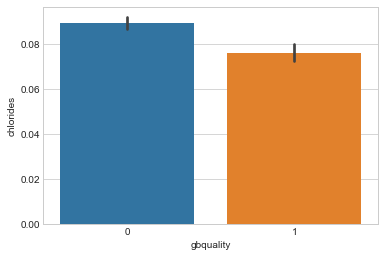

In [147]:
sns.barplot(x="gbquality",y="chlorides",data=dfnew)

<AxesSubplot:xlabel='gbquality', ylabel='free sulfur dioxide'>

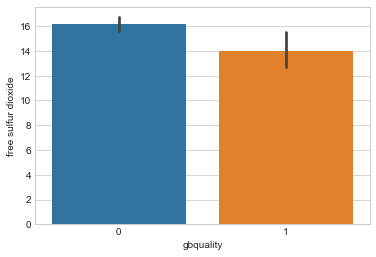

In [148]:
sns.barplot(x="gbquality",y="free sulfur dioxide",data=dfnew)

<AxesSubplot:xlabel='gbquality', ylabel='total sulfur dioxide'>

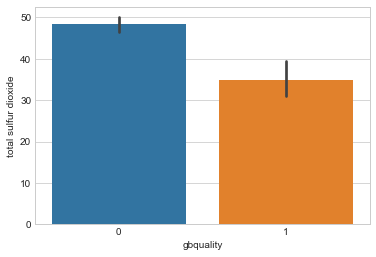

In [149]:
sns.barplot(x="gbquality",y="total sulfur dioxide",data=dfnew)

<AxesSubplot:xlabel='gbquality', ylabel='density'>

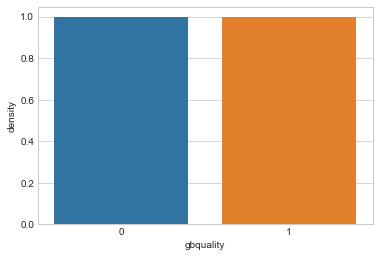

In [150]:
sns.barplot(x="gbquality",y="density",data=dfnew)

<AxesSubplot:xlabel='gbquality', ylabel='pH'>

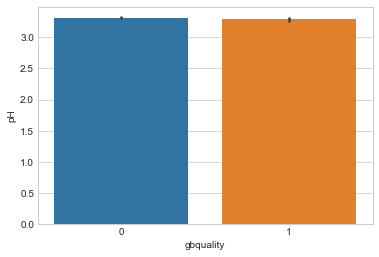

In [151]:
sns.barplot(x="gbquality",y="pH",data=dfnew)

<AxesSubplot:xlabel='gbquality', ylabel='sulphates'>

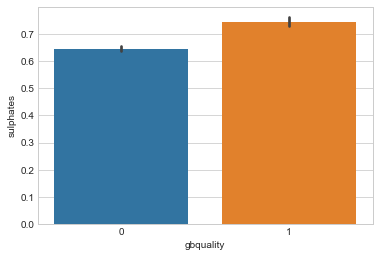

In [152]:
sns.barplot(x="gbquality",y="sulphates",data=dfnew)

<AxesSubplot:xlabel='gbquality', ylabel='alcohol'>

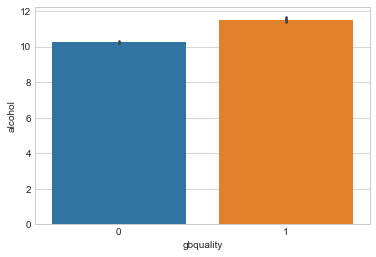

In [153]:
sns.barplot(x="gbquality",y="alcohol",data=dfnew)

<AxesSubplot:xlabel='fixed acidity', ylabel='density'>

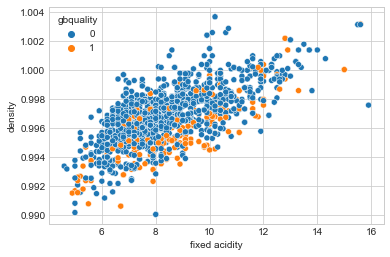

In [154]:
#Correlation between independent variables
sns.scatterplot(data=dfnew,x="fixed acidity",y="density",hue="gbquality")

<AxesSubplot:xlabel='fixed acidity', ylabel='pH'>

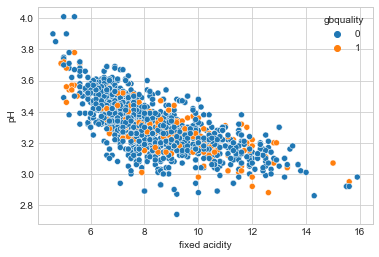

In [155]:
sns.scatterplot(data=dfnew,x="fixed acidity",y="pH",hue="gbquality")

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='total sulfur dioxide'>

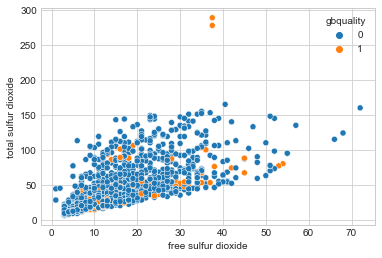

In [156]:
sns.scatterplot(data=dfnew,x="free sulfur dioxide",y="total sulfur dioxide",hue="gbquality")

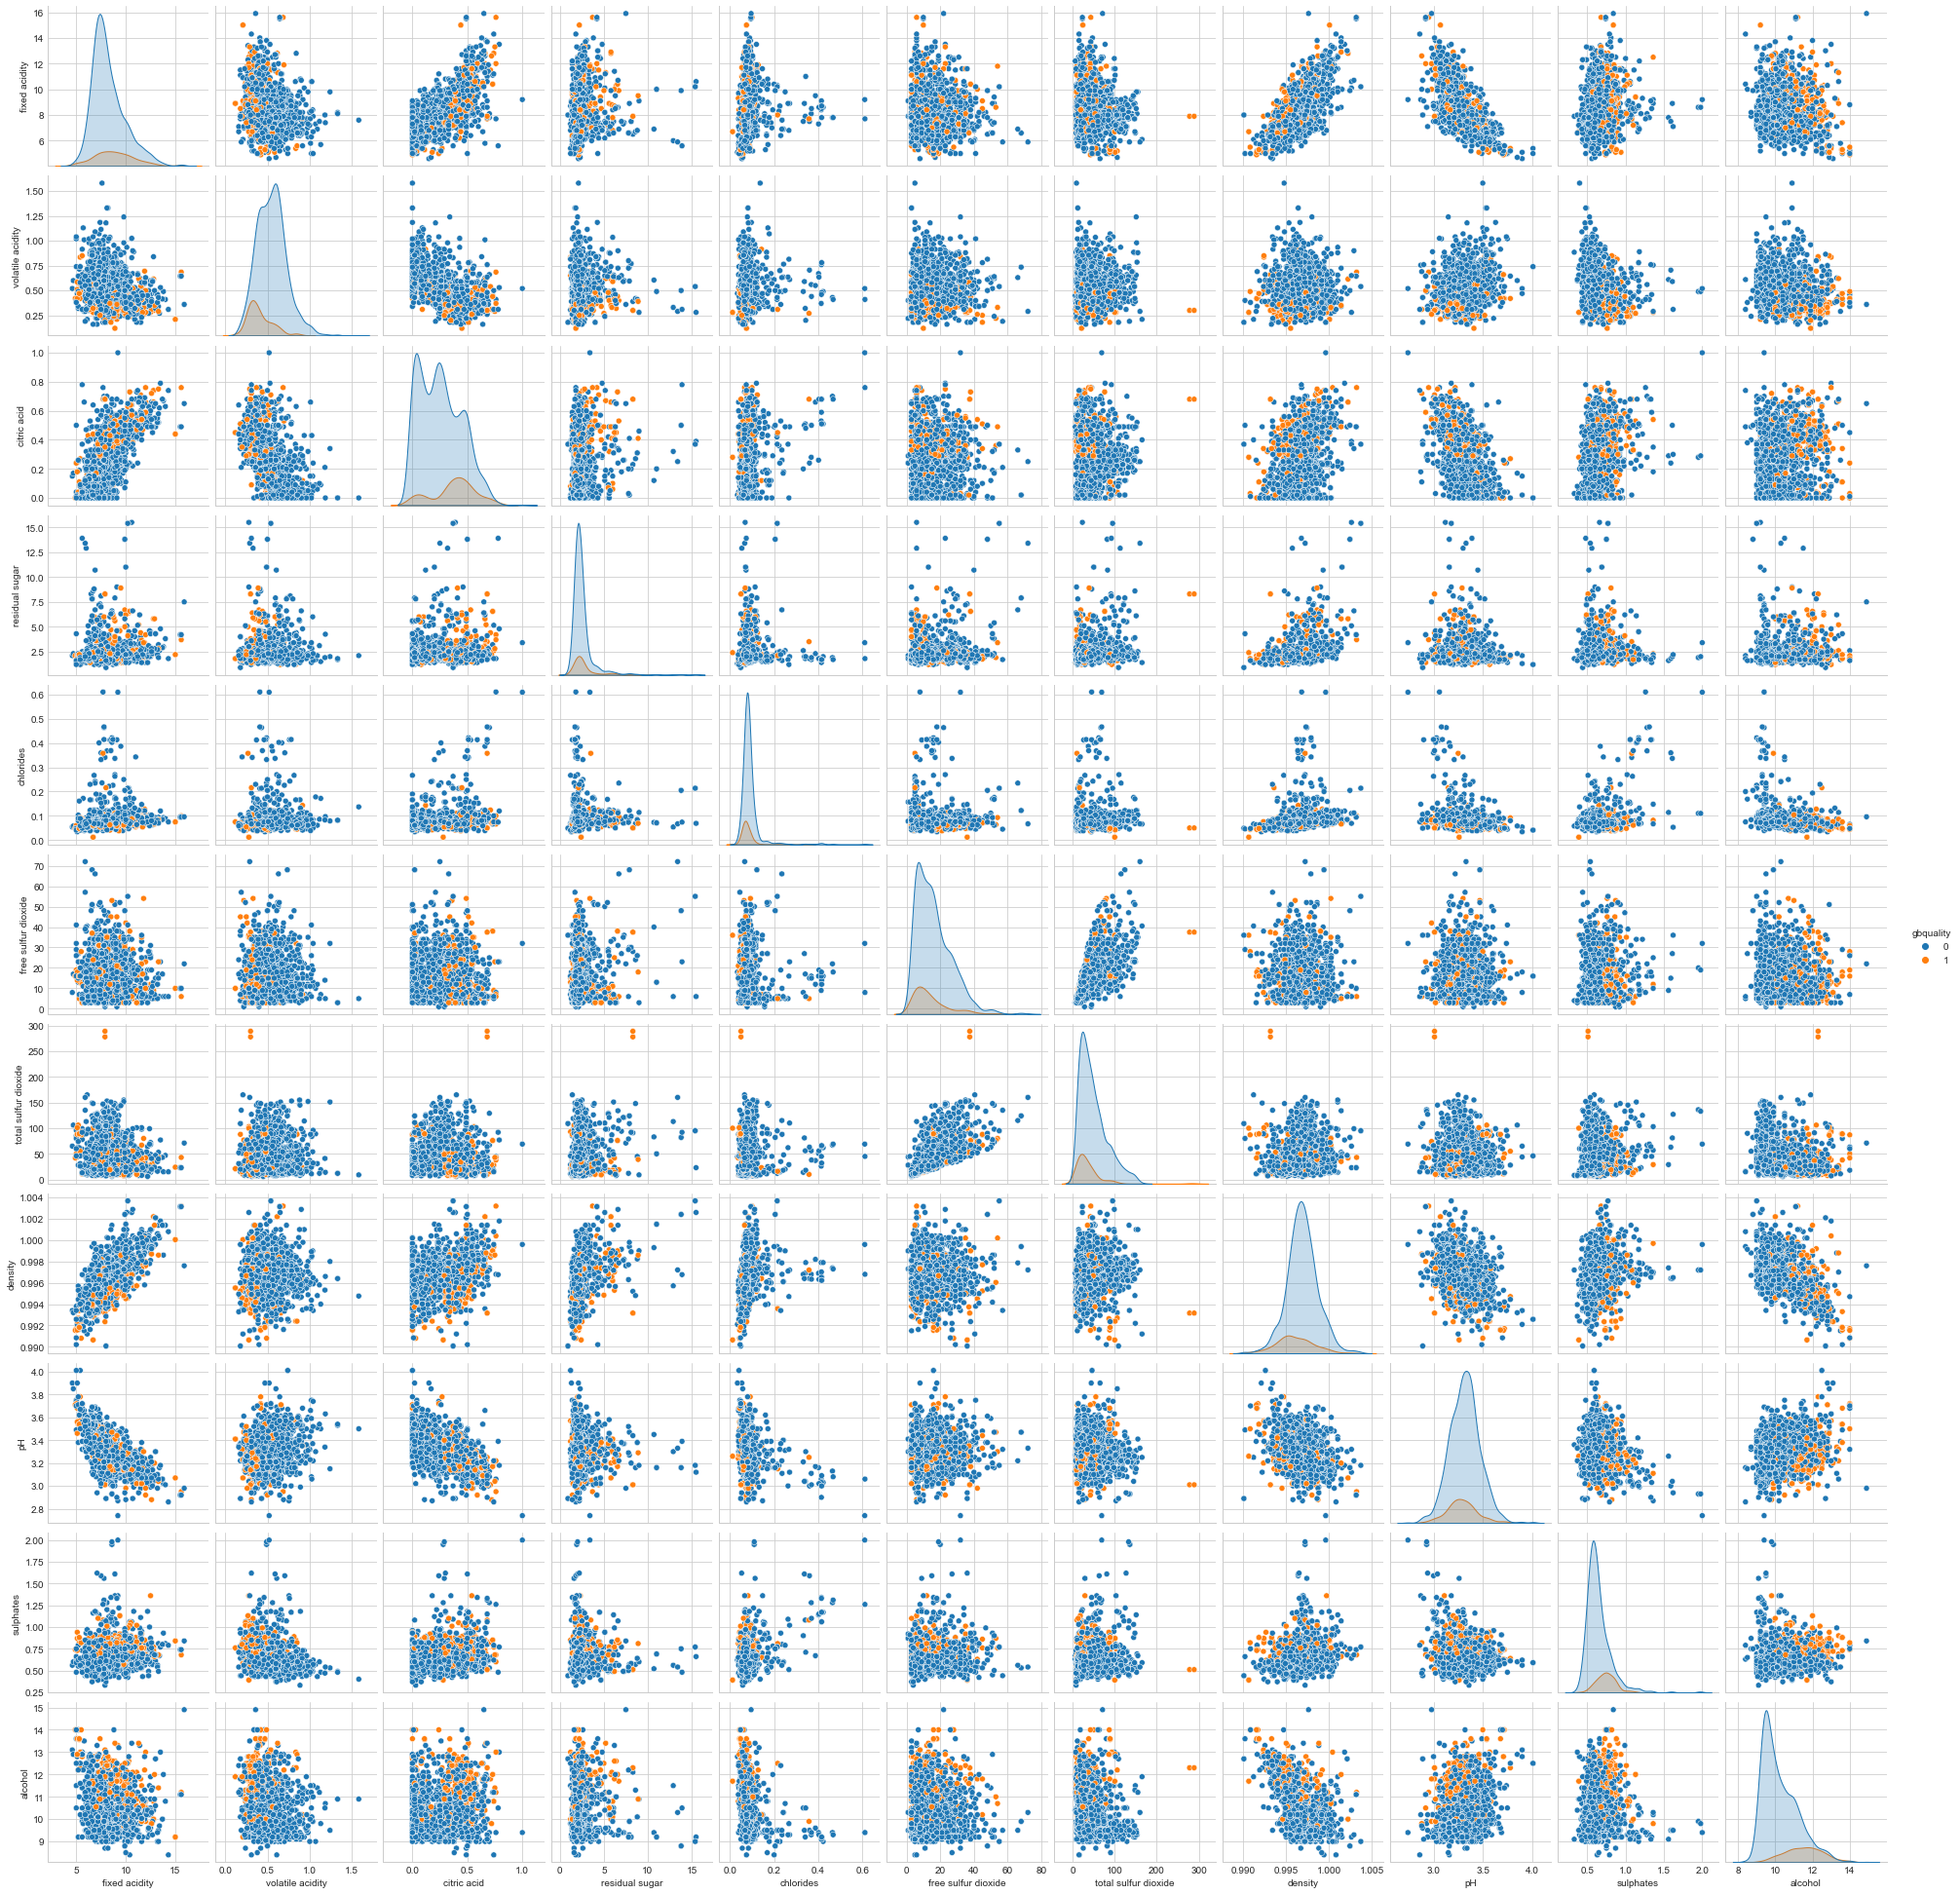

In [157]:
#Multivariate Anlysis
sns.pairplot(dfnew,hue="gbquality")

<AxesSubplot:>

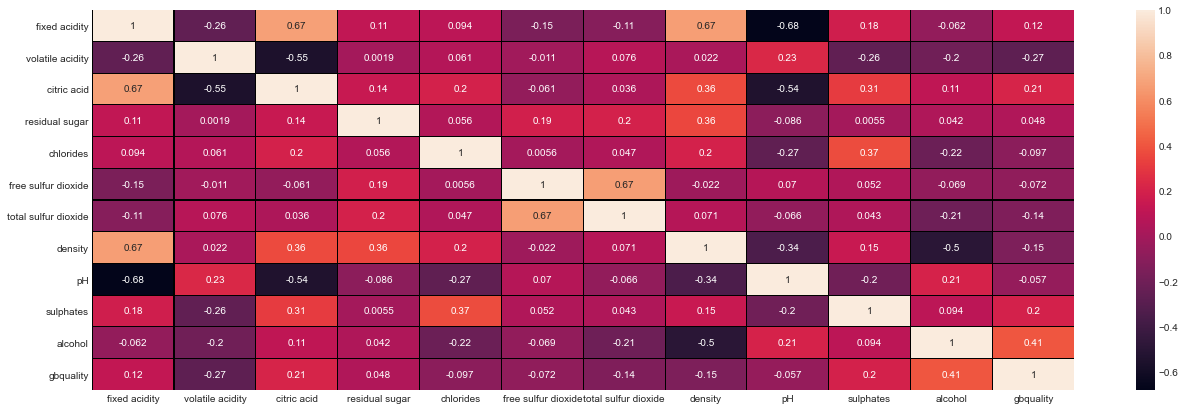

In [158]:
#Pearson correlation
plt.figure(figsize=(22,7))
sns.heatmap(dfnew.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2g")

# Data Preparation for Modelling

In [159]:
#Check skewness
dfnew.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
gbquality               2.129363
dtype: float64

In [160]:
dfnew.shape

(1599, 12)

In [161]:
#Remove outliers using zscore
zscr=np.abs(zscore(dfnew))
print(dfnew.shape)
dfn=dfnew.loc[(zscr<3).all(axis=1)]
print(dfn.shape)

(1599, 12)
(1458, 12)


In [162]:
(1458/1599)*100
#91.18% data retained

91.18198874296435

<Figure size 720x720 with 0 Axes>

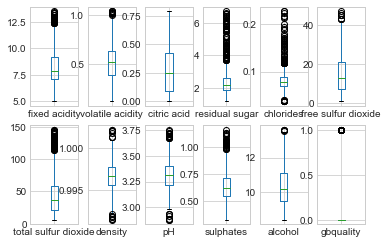

In [163]:
#Box plot after removing outlier
plt.figure(figsize=(10,10))
dfn.plot(kind='box',subplots=True,layout=(2,6))
plt.show()

In [164]:
#Skewness after removal of outlier
dfn.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
gbquality               2.103030
dtype: float64

In [165]:
dfn.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.296566     0.699747   
volatile acidity          -0.296566          1.000000    -0.589286   
citric acid                0.699747         -0.589286     1.000000   
residual sugar             0.175809          0.032331     0.178784   
chlorides                  0.187853          0.070307     0.104950   
free sulfur dioxide       -0.146702          0.008824    -0.072097   
total sulfur dioxide      -0.098843          0.104585     0.007320   
density                    0.660497         -0.000446     0.372338   
pH                        -0.704507          0.252900    -0.521270   
sulphates                  0.200796         -0.350547     0.303401   
alcohol                   -0.018384         -0.212767     0.164420   
gbquality                  0.124746         -0.268236     0.226809   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.175809   0.187853            -0.146702   
volatile acidity            0.032331   0.070307             0.008824   
citric acid                 0.178784   0.104950            -0.072097   
residual sugar              1.000000   0.121287            -0.005795   
chlorides                   0.121287   1.000000            -0.057342   
free sulfur dioxide        -0.005795  -0.057342             1.000000   
total sulfur dioxide        0.091381   0.040874             0.660348   
density                     0.343236   0.330104            -0.039334   
pH                         -0.072787  -0.183105             0.107444   
sulphates                   0.071218   0.025329             0.059713   
alcohol                     0.162423  -0.209711            -0.076400   
gbquality                   0.115612  -0.112431            -0.085448   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.098843  0.660497 -0.704507   0.200796   
volatile acidity                  0.104585 -0.000446  0.252900  -0.350547   
citric acid                       0.007320  0.372338 -0.521270   0.303401   
residual sugar                    0.091381  0.343236 -0.072787   0.071218   
chlorides                         0.040874  0.330104 -0.183105   0.025329   
free sulfur dioxide               0.660348 -0.039334  0.107444   0.059713   
total sulfur dioxide              1.000000  0.116386 -0.007726  -0.037164   
density                           0.116386  1.000000 -0.311217   0.127562   
pH                               -0.007726 -0.311217  1.000000  -0.039558   
sulphates                        -0.037164  0.127562 -0.039558   1.000000   
alcohol                          -0.257834 -0.469611  0.136659   0.240684   
gbquality                        -0.171294 -0.154221 -0.079528   0.310206   

                       alcohol  gbquality  
fixed acidity        -0.018384   0.124746  
volatile acidity     -0.212767  -0.268236  
citric acid           0.164420   0.226809  
residual sugar        0.162423   0.115612  
chlorides            -0.209711  -0.112431  
free sulfur dioxide  -0.076400  -0.085448  
total sulfur dioxide -0.257834  -0.171294  
density              -0.469611  -0.154221  
pH                    0.136659  -0.079528  
sulphates             0.240684   0.310206  
alcohol               1.000000   0.430967  
gbquality             0.430967   1.000000

In [166]:
#Removing skewness
#Removing skew using log
dfn["fixed acidity"]=np.log(dfn["fixed acidity"])
dfn["residual sugar"]=np.log(dfn["residual sugar"]) 
dfn["chlorides"]=np.sqrt(dfn["chlorides"])
dfn["free sulfur dioxide"]=np.log(dfn["free sulfur dioxide"])
dfn["total sulfur dioxide"]=np.log(dfn["total sulfur dioxide"])
dfn["sulphates"]=np.log(dfn["sulphates"])
dfn["alcohol"]=np.log(dfn["alcohol"])

In [167]:
#Skewness 
dfn.skew()

fixed acidity           0.377100
volatile acidity        0.392097
citric acid             0.292600
residual sugar          1.229070
chlorides               1.342480
free sulfur dioxide    -0.300264
total sulfur dioxide   -0.095735
density                 0.055543
pH                      0.113039
sulphates               0.345344
alcohol                 0.588835
gbquality               2.103030
dtype: float64

In [168]:
#Data distribution of variables after removing skewness
px.histogram(dfn, x="fixed acidity")
#Data is normally distributed

In [169]:
px.histogram(dfn, x="residual sugar")
#Data is normally distributed

In [170]:
px.histogram(dfn, x="chlorides")
#Data is normally distributed

In [171]:
px.histogram(dfn, x="free sulfur dioxide")
#Data is normally distributed

In [172]:
px.histogram(dfn, x="total sulfur dioxide")
#Data is normally distributed

In [173]:
px.histogram(dfn, x="sulphates")
#Data is normally distributed

In [174]:
px.histogram(dfn, x="alcohol")
#Data is normally distributed

In [175]:
dfn["gbquality"].value_counts()

0    1257
1     201
Name: gbquality, dtype: int64

In [176]:
#Seperate independent & dependent variable
x=dfn.drop(["gbquality"],axis=1)
y=dfn["gbquality"]
print(x.shape,y.shape)

(1458, 11) (1458,)


Imbalance Learning

In [177]:
# Dealing data imbalance with over sampling
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=2)
x_res,y_res=sm.fit_sample(x,y.values.ravel())

In [178]:
print('After OverSampling, the shape of x: {}'.format(x_res.shape)) 
print('After OverSampling, the shape of y: {} \n'.format(y_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))

After OverSampling, the shape of x: (2514, 11)
After OverSampling, the shape of y: (2514,) 

After OverSampling, counts of label '1': 1257
After OverSampling, counts of label '0': 1257


In [179]:
print(x_res.shape,y_res.shape)

(2514, 11) (2514,)


In [180]:
x_res

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          2.001480          0.700000     0.000000        0.641854   0.275681   
1          2.054124          0.880000     0.000000        0.955511   0.313050   
2          2.054124          0.760000     0.040000        0.832909   0.303315   
3          2.415914          0.280000     0.560000        0.641854   0.273861   
4          2.001480          0.700000     0.000000        0.641854   0.275681   
5          2.001480          0.660000     0.000000        0.587787   0.273861   
6          2.066863          0.600000     0.060000        0.470004   0.262679   
7          1.987874          0.650000     0.000000        0.182322   0.254951   
8          2.054124          0.580000     0.020000        0.693147   0.270185   
9          2.014903          0.500000     0.360000        1.808289   0.266458   
10         1.902108          0.580000     0.080000        0.587787   0.311448   
11         2.014903          0.500000     0.360000        1.808289   0.266458   
12         1.722767          0.615000     0.000000        0.470004   0.298329   
13         2.140066          0.280000     0.560000        0.587787   0.303315   
14         2.001480          0.590000     0.080000        1.481605   0.293258   
15         2.186051          0.220000     0.480000        0.587787   0.277489   
16         2.028148          0.390000     0.310000        0.832909   0.286356   
17         2.066863          0.430000     0.210000        0.470004   0.325576   
18         2.140066          0.490000     0.110000        0.832909   0.289828   
19         1.931521          0.400000     0.140000        0.875469   0.291548   
20         1.840550          0.390000     0.160000        0.336472   0.282843   
21         2.028148          0.410000     0.240000        0.587787   0.282843   
22         2.066863          0.430000     0.210000        0.470004   0.325576   
23         1.960095          0.710000     0.000000        0.641854   0.282843   
24         2.054124          0.645000     0.000000        0.693147   0.286356   
25         1.902108          0.675000     0.070000        0.875469   0.298329   
26         1.931521          0.685000     0.000000        0.916291   0.324037   
27         2.116256          0.655000     0.120000        0.832909   0.288097   
28         1.648659          0.320000     0.250000        0.587787   0.320936   
29         2.054124          0.645000     0.000000        1.704748   0.293258   
30         2.054124          0.600000     0.140000        0.875469   0.293258   
31         2.091864          0.380000     0.280000        0.741937   0.256905   
32         1.987874          0.450000     0.360000        1.774952   0.272029   
33         1.987874          0.450000     0.360000        1.774952   0.272029   
34         2.174752          0.610000     0.300000        1.029619   0.296648   
35         1.916923          0.670000     0.020000        0.587787   0.223607   
36         2.041220          0.935000     0.430000        0.788457   0.337639   
37         2.163323          0.290000     0.520000        0.470004   0.336155   
38         1.856298          0.400000     0.230000        0.470004   0.256905   
39         1.722767          0.310000     0.370000        0.336472   0.272029   
40         2.174752          0.660000     0.260000        0.530628   0.272029   
41         1.887070          0.520000     0.040000        0.788457   0.262679   
42         1.887070          0.500000     0.040000        0.741937   0.260768   
43         2.151762          0.380000     0.360000        1.098612   0.284605   
44         2.028148          0.510000     0.150000        1.029619   0.331662   
45         2.041220          0.620000     0.040000        1.335001   0.289828   
46         2.322388          0.420000     0.570000        1.223775   0.264575   
47         2.054124          0.590000     0.180000        0.832909   0.275681   
48         1.987874          0.390000

In [181]:
y_res
#Need to reshape

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [182]:
y_res=y_res.reshape(-1,1)

In [183]:
y_res

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [184]:
# Data scaling not required as data all datapoints are in more or less same scale

# Best Random State

In [185]:
#Train-test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,random_state=42,test_size=0.20)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(2011, 11) (503, 11)
(2011, 1) (503, 1)


In [186]:
#Best Random State & Algorithm code
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
def maxacc_score(clf,df_x,y):
    maxa=0
    rs=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x_res, y_res,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        tmp=accuracy_score(y_test,y_pred)
        if tmp>maxa:
            maxa=tmp
            rs=r_state
    print("Maximum accuracy_score is at random state :",rs," and it is :",maxa)
    print("Confusion matrix\n",confusion_matrix(y_test,y_pred))
    print("Classification report\n",classification_report(y_test,y_pred))
    

# 1.Decision Tree Classifier

In [187]:
#Decision tree classifier
#Hyper parameter tuning 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
dt_clf=DecisionTreeClassifier()
clf = GridSearchCV(dt_clf, parameters, cv=5)
clf.fit(x_res,y_res)
clf.best_params_

{'criterion': 'entropy', 'max_depth': 90}

In [188]:
#Decision tree Classifier
dt=DecisionTreeClassifier(criterion="entropy",max_depth=40)
maxacc_score(dt,x_res,y_res)

Maximum accuracy_score is at random state : 72  and it is : 0.9363817097415507
Confusion matrix
 [[220  31]
 [ 14 238]]
Classification report
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       251
           1       0.88      0.94      0.91       252

    accuracy                           0.91       503
   macro avg       0.91      0.91      0.91       503
weighted avg       0.91      0.91      0.91       503



In [189]:
#Lets use cross_val_score and evaluate the Decision tree classifier
from sklearn.model_selection import cross_val_score
cv_dt=cross_val_score(dt,x_res,y_res,cv=5)
print("Mean Accuracy score for Decision tree classifier: ",cv_dt.mean())
print(cv_dt)

Mean Accuracy score for Decision tree classifier:  0.8719024498427761
[0.92246521 0.87276342 0.87475149 0.85487078 0.83466135]


<function matplotlib.pyplot.show(close=None, block=None)>

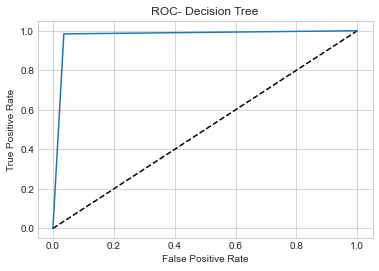

In [201]:
#AUC-ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=dt.predict_proba(x_test)[:,-1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

#ROC Curve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC- Decision Tree")
plt.show

# 2. Naive Bayes Classifier- GaussianNB

In [190]:
#Naive Bayes Classifier- GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
maxacc_score(gnb,x_res,y_res)

Maximum accuracy_score is at random state : 87  and it is : 0.8608349900596421
Confusion matrix
 [[193  58]
 [ 41 211]]
Classification report
               precision    recall  f1-score   support

           0       0.82      0.77      0.80       251
           1       0.78      0.84      0.81       252

    accuracy                           0.80       503
   macro avg       0.80      0.80      0.80       503
weighted avg       0.80      0.80      0.80       503



In [191]:
#Lets use cross_val_score and evaluate the Gaussian NB classifier
from sklearn.model_selection import cross_val_score
cv_gnb=cross_val_score(gnb,x_res,y_res,cv=5)
print("Mean Accuracy score for Decision tree classifier: ",cv_gnb.mean())
print(cv_gnb)

Mean Accuracy score for Decision tree classifier:  0.8027175591867124
[0.84493042 0.73359841 0.84691849 0.75347913 0.83466135]


<function matplotlib.pyplot.show(close=None, block=None)>

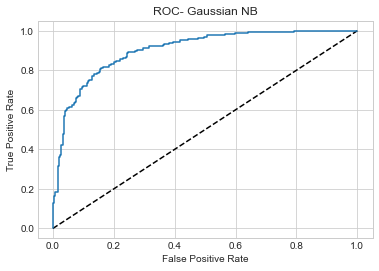

In [200]:
#AUC-ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=gnb.predict_proba(x_test)[:,-1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

#ROC Curve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC- Gaussian NB")
plt.show

# 3. K-Nearest Neighbor Classifier

In [192]:
#For KNN we need to know the best value of k using grid search
#Hyper parameter tuning 
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(kc, neighbors, cv=5)
clf.fit(x_res,y_res)
clf.best_params_

{'n_neighbors': 2}

In [193]:
kc=KNeighborsClassifier(n_neighbors=2)
maxacc_score(kc,x_res,y_res)

Maximum accuracy_score is at random state : 73  and it is : 0.9662027833001988
Confusion matrix
 [[227  24]
 [  7 245]]
Classification report
               precision    recall  f1-score   support

           0       0.97      0.90      0.94       251
           1       0.91      0.97      0.94       252

    accuracy                           0.94       503
   macro avg       0.94      0.94      0.94       503
weighted avg       0.94      0.94      0.94       503



In [194]:
#Lets use cross_val_score and evaluate the knn model
from sklearn.model_selection import cross_val_score
cv_kc=cross_val_score(kc,x_res,y_res,cv=5)
print("Mean Accuracy score for knn classifier: ",cv_kc.mean())
print(cv_kc)

Mean Accuracy score for knn classifier:  0.9057297648372712
[0.94632207 0.86083499 0.92445328 0.88667992 0.91035857]


<function matplotlib.pyplot.show(close=None, block=None)>

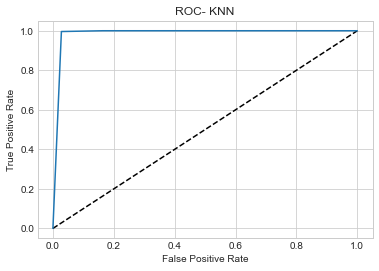

In [199]:
#AUC-ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=kc.predict_proba(x_test)[:,-1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

#ROC Curve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC- KNN")
plt.show

# 4.Support Vector Classifier

In [195]:
#Support Vector Classifier
#Check best parameter for SVC (Hyper parameter tuning )
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="f1")
clf.fit(x_res,y_res)
clf.best_params_

{'C': 10, 'kernel': 'rbf'}

In [196]:
svc=SVC(kernel="rbf",C=10)
maxacc_score(svc,x_res,y_res)

Maximum accuracy_score is at random state : 64  and it is : 0.8628230616302187
Confusion matrix
 [[200  51]
 [ 29 223]]
Classification report
               precision    recall  f1-score   support

           0       0.87      0.80      0.83       251
           1       0.81      0.88      0.85       252

    accuracy                           0.84       503
   macro avg       0.84      0.84      0.84       503
weighted avg       0.84      0.84      0.84       503



In [197]:
#Lets use cross_val_score and evaluate the Support Vector classifier
from sklearn.model_selection import cross_val_score
cv_svc=cross_val_score(svc,x_res,y_res,cv=5)
print("Mean Accuracy score for Support Vector classifier: ",cv_svc.mean())
print(cv_svc)

Mean Accuracy score for Support Vector classifier:  0.8174245364466588
[0.88071571 0.7972167  0.84294235 0.74353877 0.82270916]


# 5.Random Forest Classifier

In [81]:
#Random forest classifier
##Hyper parameter tuning 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,100,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=5)
clf.fit(x_res,y_res)
clf.best_params_

{'n_estimators': 500}

In [105]:
rf_clf=RandomForestClassifier(n_estimators=500)
maxacc_score(rf_clf,x_res,y_res)

Maximum accuracy_score is at random state : 45  and it is : 0.9622266401590457
Confusion matrix
 [[228  23]
 [  6 246]]
Classification report
               precision    recall  f1-score   support

           0       0.97      0.91      0.94       251
           1       0.91      0.98      0.94       252

    accuracy                           0.94       503
   macro avg       0.94      0.94      0.94       503
weighted avg       0.94      0.94      0.94       503



In [83]:
#Evaluate Random forest classifier by cross validation
from sklearn.model_selection import cross_val_score
cv_rf=cross_val_score(rf_clf,x_res,y_res,cv=5)
print("Mean Accuracy score for Random forest classifier: ",cv_rf.mean())
print(cv_rf)

Mean Accuracy score for Random forest classifier:  0.9108995429811568
[0.96620278 0.87673956 0.944334   0.85487078 0.9123506 ]


<function matplotlib.pyplot.show(close=None, block=None)>

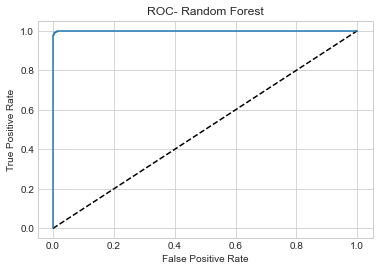

In [115]:
#AUC-ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=rf_clf.predict_proba(x_test)[:,-1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

#ROC Curve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC- Random Forest")
plt.show

In [95]:
#Result
result=pd.DataFrame({"Classifier Model":["Decision Tree","GaussianNB","K-Nearest Neighbour","Support Vector","Random Forest"],
                     "Accuracy":[93.04,86.08,96.62,86.28,96.22],
                    "Cross Validation":[87.95,80.27,90.58,81.74,91.09]})
result

Classifier Model  Accuracy  Cross Validation
0        Decision Tree     93.04             87.95
1           GaussianNB     86.08             80.27
2  K-Nearest Neighbour     96.62             90.58
3       Support Vector     86.28             81.74
4        Random Forest     96.22             91.09

In [96]:
result["Difference"]=result["Accuracy"]-result["Cross Validation"]
result

Classifier Model  Accuracy  Cross Validation  Difference
0        Decision Tree     93.04             87.95        5.09
1           GaussianNB     86.08             80.27        5.81
2  K-Nearest Neighbour     96.62             90.58        6.04
3       Support Vector     86.28             81.74        4.54
4        Random Forest     96.22             91.09        5.13

# Support Vector Classifier best working model.

In [205]:
#SVC
#Best random state=64
# Best Parameters: kernel="rbf",C=10
x_train,x_test,y_train,y_test=train_test_split(x_res, y_res,random_state = 64,test_size=0.20)
svc=SVC(kernel="rbf",C=10)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)        
print("Accuracy_score = :",accuracy_score(y_test,y_pred))
print("Confusion matrix\n",confusion_matrix(y_test,y_pred))
print("Classification report\n",classification_report(y_test,y_pred))

Accuracy_score = : 0.8230616302186878
Confusion matrix
 [[198  57]
 [ 32 216]]
Classification report
               precision    recall  f1-score   support

           0       0.86      0.78      0.82       255
           1       0.79      0.87      0.83       248

    accuracy                           0.82       503
   macro avg       0.83      0.82      0.82       503
weighted avg       0.83      0.82      0.82       503



In [206]:
#Saving the best model
import joblib  
joblib.dump(svc,'Wine_dataset.joblib')

['Wine_dataset.joblib']